## Edunet Foundation 

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report 


import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv("./Data/lab 12/Train.csv")
test_df = pd.read_csv("./Data/lab 12//Test.csv")

In [4]:
df = pd.concat([train_df, test_df])

In [5]:
df.head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


### Data Cleaning

In [6]:
# dropping the rows having NaN values
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [8]:
df['Segmentation'].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

In [9]:
print("Gender: ", df['Gender'].unique())
print("Ever_Married: ", df['Ever_Married'].unique())
print("Graduated: ", df['Graduated'].unique())

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes']
Graduated:  ['No' 'Yes']


In [10]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Ever_Married'] = df['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Graduated'] = df['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [12]:
df['Spending_Score'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Spending_Score'].replace(to_replace = 'Average', value = 1, inplace = True)
df['Spending_Score'].replace(to_replace = 'High', value = 2, inplace = True)

In [13]:
df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [14]:
df['Var_1'].replace(to_replace = 'Cat_1', value = 1, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_2', value = 2, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_3', value = 3, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_4', value = 4, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_5', value = 5, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_6', value = 6, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_7', value = 7, inplace = True)

In [15]:
df['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [16]:
df['Segmentation'].replace(to_replace = 'A', value = 0, inplace = True)
df['Segmentation'].replace(to_replace = 'B', value = 1, inplace = True)
df['Segmentation'].replace(to_replace = 'C', value = 2, inplace = True)
df['Segmentation'].replace(to_replace = 'D', value = 3, inplace = True)

In [17]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,1,1,41,1,Artist,0.0,2,5.0,6,1
8064,464685,1,0,35,0,Executive,3.0,0,4.0,4,3
8065,465406,0,0,33,1,Healthcare,1.0,0,1.0,6,3
8066,467299,0,0,27,1,Healthcare,1.0,0,4.0,6,1


In [18]:
label ={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

Text(0.5, 1.08, 'Pair Plot Analysis')

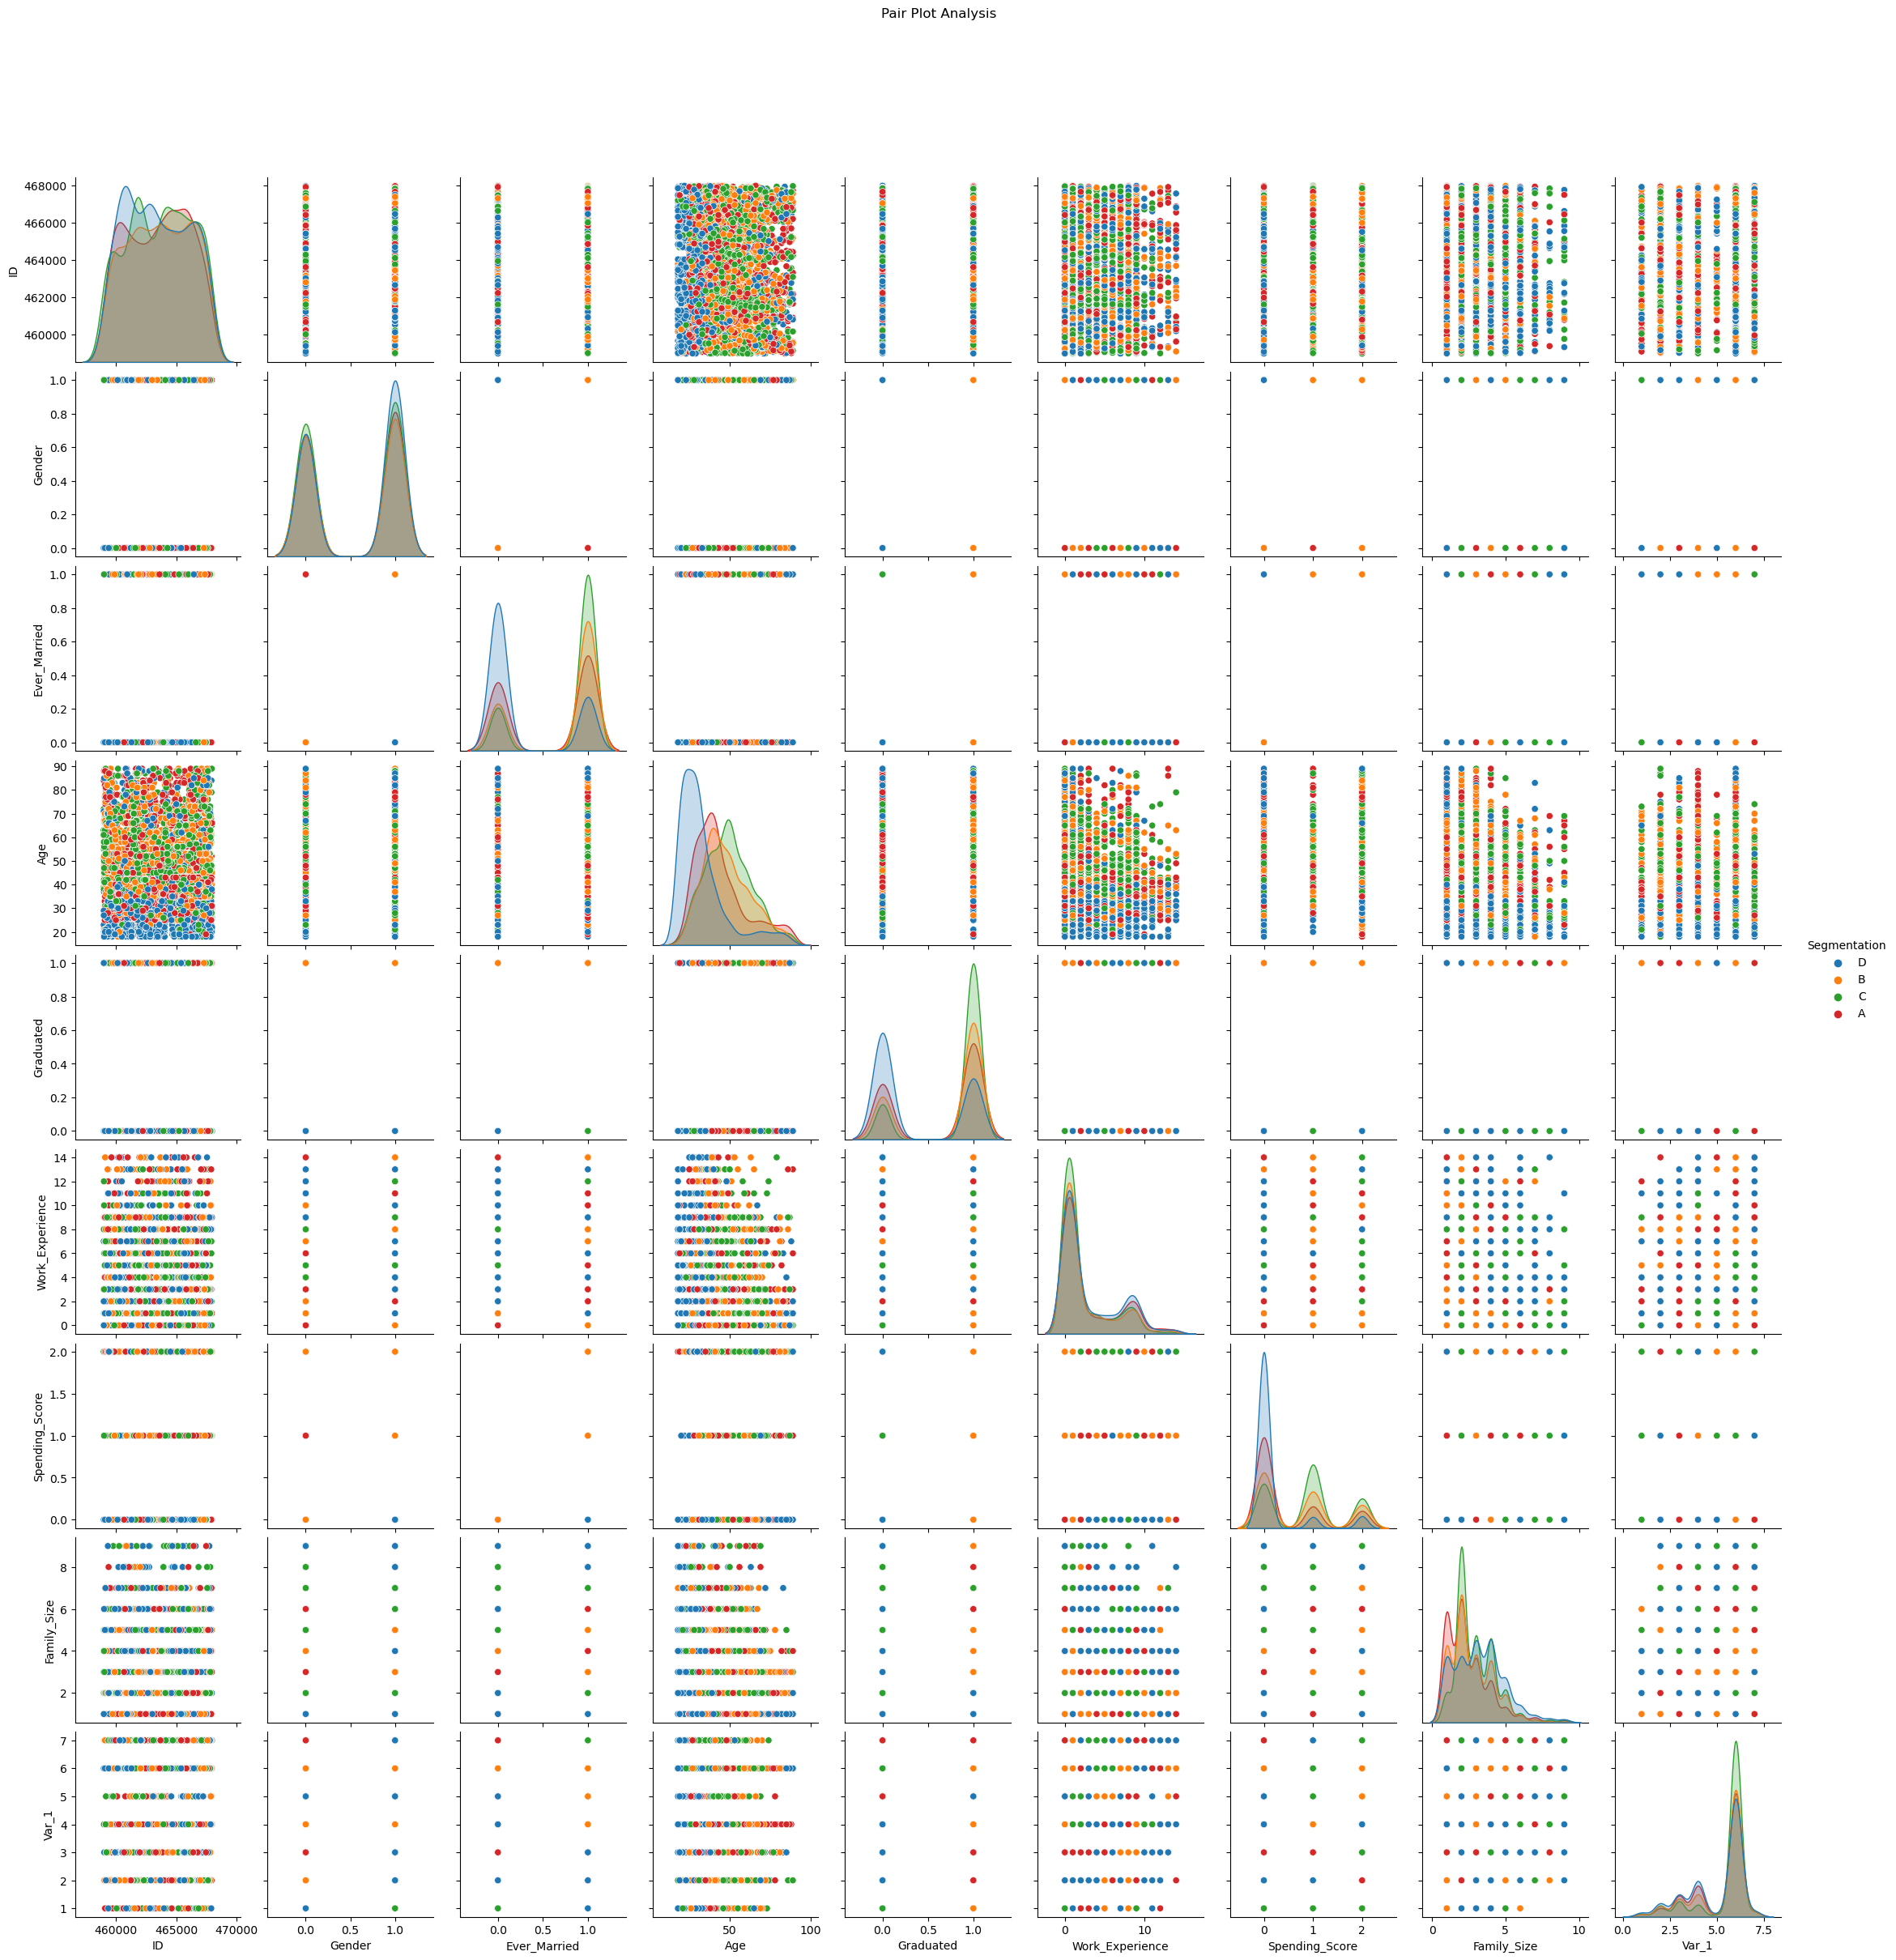

In [19]:
plotdata = sns.pairplot(df.replace({'Segmentation' : label}), hue = 'Segmentation')
plotdata.fig.suptitle("Pair Plot Analysis", y = 1.08)

In [21]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']].values
x

array([[ 1.,  0., 22., ...,  0.,  4.,  4.],
       [ 0.,  1., 67., ...,  0.,  1.,  6.],
       [ 1.,  1., 67., ...,  2.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  0.,  1.,  6.],
       [ 0.,  0., 27., ...,  0.,  4.,  6.],
       [ 1.,  1., 37., ...,  1.,  3.,  4.]])

In [22]:
y = df.iloc[:, 10].values
y

array([3, 1, 1, ..., 3, 1, 1], dtype=int64)

### Train & Test Spilitting


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
print(x_train.shape)

(4665, 8)


### Logistic Regression

In [25]:

model = LogisticRegression(max_iter = 600)
model.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [26]:
y_pred_lr = model.predict(x_test)

In [27]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))


Accuracy :  0.4505


In [28]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.38      0.35      0.37       496
           1       0.36      0.10      0.15       501
           2       0.44      0.63      0.52       521
           3       0.53      0.72      0.61       482

    accuracy                           0.45      2000
   macro avg       0.43      0.45      0.41      2000
weighted avg       0.43      0.45      0.41      2000



In [29]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[174  35 138 149]
 [125  49 248  79]
 [ 73  39 330  79]
 [ 84  13  37 348]]


<Axes: >

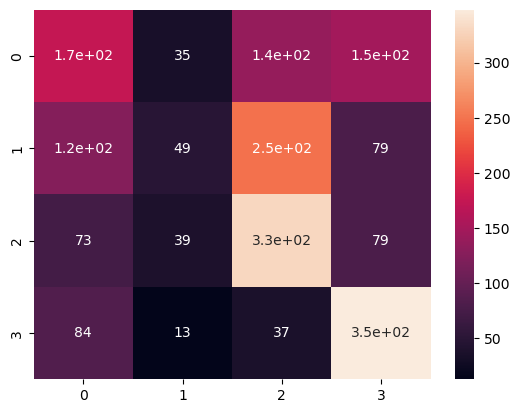

In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

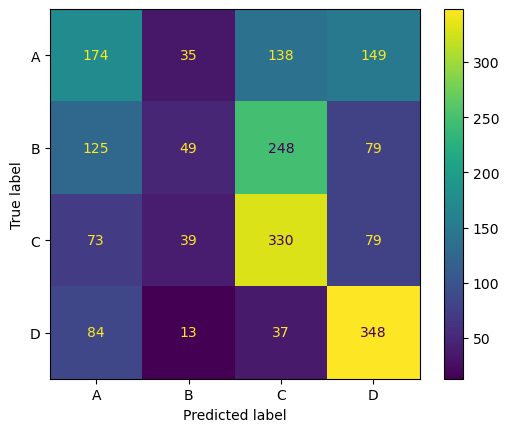

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

In [32]:
### Random Forest
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [33]:
y_pred_rf = model_rf.predict(x_test)

In [34]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.442


In [35]:
cr = classification_report(y_test, y_pred_rf)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.38      0.34      0.36       496
           1       0.35      0.29      0.31       501
           2       0.47      0.51      0.49       521
           3       0.54      0.63      0.58       482

    accuracy                           0.44      2000
   macro avg       0.43      0.44      0.44      2000
weighted avg       0.43      0.44      0.43      2000



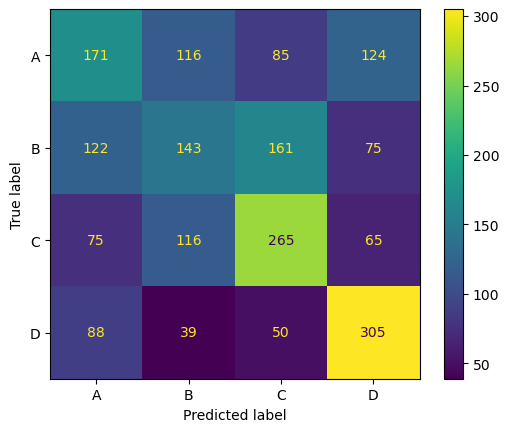

In [36]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

In [37]:
### KNN
iteration = 25


In [38]:
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
    scores[i] = metrics.accuracy_score(y_test, y_pred_knn)
    acc.append(metrics.accuracy_score(y_test, y_pred_knn))

scores

{1: 0.4045,
 2: 0.375,
 3: 0.404,
 4: 0.423,
 5: 0.416,
 6: 0.4155,
 7: 0.4295,
 8: 0.4335,
 9: 0.442,
 10: 0.4335,
 11: 0.4475,
 12: 0.4415,
 13: 0.4495,
 14: 0.4555,
 15: 0.453,
 16: 0.4465,
 17: 0.4495,
 18: 0.4505,
 19: 0.452,
 20: 0.45,
 21: 0.4475,
 22: 0.4405,
 23: 0.45,
 24: 0.4545}

Minimum error:- 0.5445 at K = 13


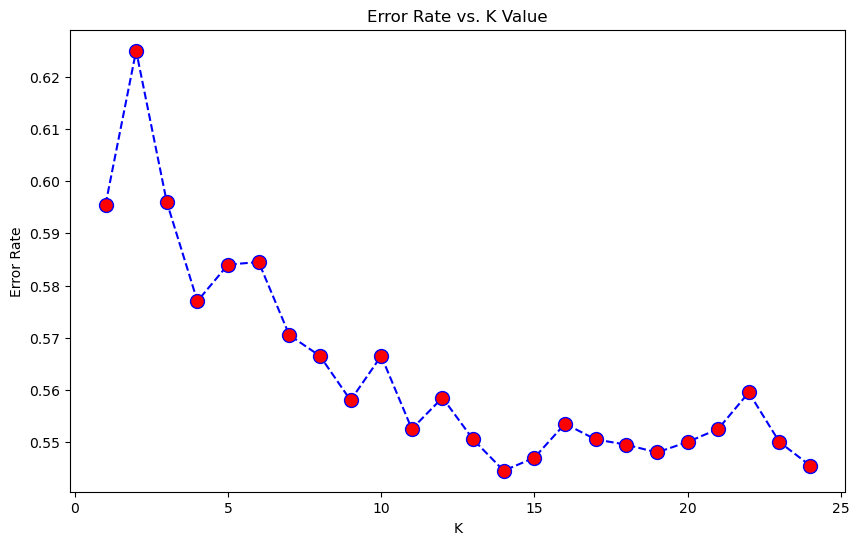

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.4555 at K = 13


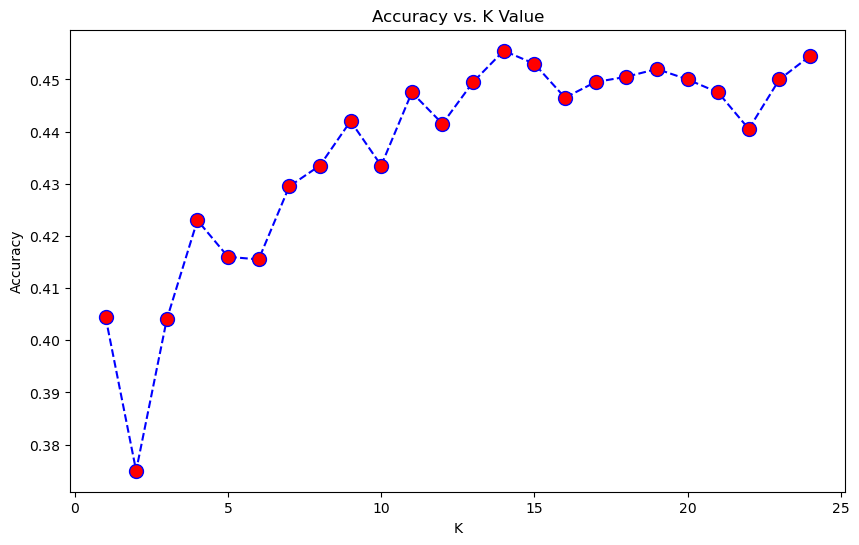

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),acc,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [41]:
model_knn = KNeighborsClassifier(n_neighbors = 23)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

In [42]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.45


In [43]:
cr = classification_report(y_test, y_pred_knn)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.38      0.34      0.36       496
           1       0.35      0.21      0.26       501
           2       0.45      0.59      0.51       521
           3       0.56      0.66      0.60       482

    accuracy                           0.45      2000
   macro avg       0.43      0.45      0.43      2000
weighted avg       0.43      0.45      0.43      2000



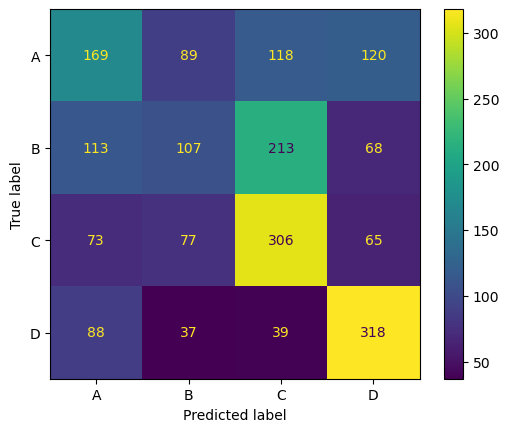

In [44]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()